In [ ]:
# import os
# import numpy as np
# import shutil
# import random

# root_dir = 'final2040/HMDB_more/'

# test_ratio = 0.20

# train_dir = 'final2040/HMDB_more/train2/'
# test_dir = 'final2040/HMDB_more/test2/'

# for cls in classes:
#     os.makedirs(train_dir + cls)
#     os.makedirs(test_dir + cls)

#     src = root_dir + cls

#     allFileNames = os.listdir(src)
#     np.random.shuffle(allFileNames)
#     train_FileNames, test_FileNames = np.split(np.array(allFileNames),[int(len(allFileNames)* (1 - test_ratio))])


#     train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
#     test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

#     print("*****************************")
#     print('Total files: ', len(allFileNames))
#     print('Training: ', len(train_FileNames))
#     print('Testing: ', len(test_FileNames))
#     print("*****************************")



#     for name in train_FileNames:
#         shutil.copy(name, train_dir + cls)

#     for name in test_FileNames:
#         shutil.copy(name, test_dir + cls)
#     print("Copying Done!")

*****************************
Total files:  216
Training:  172
Testing:  44
*****************************
Copying Done!
*****************************
Total files:  215
Training:  172
Testing:  43
*****************************
Copying Done!
*****************************
Total files:  204
Training:  163
Testing:  41
*****************************
Copying Done!
*****************************
Total files:  218
Training:  174
Testing:  44
*****************************
Copying Done!
*****************************
Total files:  260
Training:  208
Testing:  52
*****************************
Copying Done!
*****************************
Total files:  216
Training:  172
Testing:  44
*****************************
Copying Done!
*****************************
Total files:  224
Training:  179
Testing:  45
*****************************
Copying Done!
*****************************
Total files:  254
Training:  203
Testing:  51
*****************************
Copying Done!
*****************************
Total file

In [ ]:
pip install keras-video-generators

In [ ]:
import os
import glob
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras_video import VideoFrameGenerator
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/Shareddrives/

/content/gdrive/Shareddrives


In [ ]:
for i in glob.glob('final2040/HMDB_more/test2/*'):
  print(i.split(os.path.sep)[3])

brush_hair
cartwheel
catch
chew
clap
climb
climb_stairs
dive
draw_sword
dribble
drink
eat
fall_floor
fencing
flic_flac
golf
handstand
hit
hug
jump
kick
kick_ball
kiss
laugh
pick
pour
pullup
punch
push
pushup
ride_bike
ride_horse
run
shake_hands
shoot_ball
shoot_bow
shoot_gun
sit
situp
smile
smoke
somersault
stand
swing_baseball
sword
sword_exercise
talk
throw
turn
walk
wave


In [ ]:
# use sub directories names as classes
classes = [i.split(os.path.sep)[3] for i in glob.glob('final2040/HMDB_more/test2/*')]
classes.sort()
print(classes)

# some global params
SIZE = 224
CHANNELS = 3
NBFRAME = 5
BS = 10

# pattern to get videos and classes
glob_pattern='final2040/HMDB_more/test2/{classname}/*.avi'

# for data augmentation
data_aug = keras.preprocessing.image.ImageDataGenerator()


['brush_hair', 'cartwheel', 'catch', 'chew', 'clap', 'climb', 'climb_stairs', 'dive', 'draw_sword', 'dribble', 'drink', 'eat', 'fall_floor', 'fencing', 'flic_flac', 'golf', 'handstand', 'hit', 'hug', 'jump', 'kick', 'kick_ball', 'kiss', 'laugh', 'pick', 'pour', 'pullup', 'punch', 'push', 'pushup', 'ride_bike', 'ride_horse', 'run', 'shake_hands', 'shoot_ball', 'shoot_bow', 'shoot_gun', 'sit', 'situp', 'smile', 'smoke', 'somersault', 'stand', 'swing_baseball', 'sword', 'sword_exercise', 'talk', 'throw', 'turn', 'walk', 'wave']


In [ ]:
# Create video frame generator
train = VideoFrameGenerator(
    classes=classes, 
    glob_pattern=glob_pattern,
    nb_frames=NBFRAME,
    split=0.999, 
    shuffle=True,
    batch_size=1,
    target_shape= (SIZE,SIZE),
    nb_channel=CHANNELS,
    transformation=data_aug,
    use_frame_cache=True)

Warning, `split` argument is replaced by `split_val`, please condider to change your source code.The `split` argument will be removed in future releases.


class brush_hair, validation count: 24, train count: 1
class cartwheel, validation count: 20, train count: 1
class catch, validation count: 21, train count: 1
class chew, validation count: 22, train count: 1
class clap, validation count: 27, train count: 1
class climb, validation count: 20, train count: 1
class climb_stairs, validation count: 23, train count: 1
class dive, validation count: 29, train count: 1
class draw_sword, validation count: 25, train count: 1
class dribble, validation count: 29, train count: 1
class drink, validation count: 35, train count: 1
class eat, validation count: 23, train count: 1
class fall_floor, validation count: 21, train count: 1
class fencing, validation count: 26, train count: 1
class flic_flac, validation count: 18, train count: 1
class golf, validation count: 13, train count: 1
class handstand, validation count: 22, train count: 1
class hit, validation count: 27, train count: 1
class hug, validation count: 22, train count: 1
class jump, validation

In [ ]:
#get validation data
valid = train.get_validation_generator()

Total data: 51 classes for 1327 files for validation


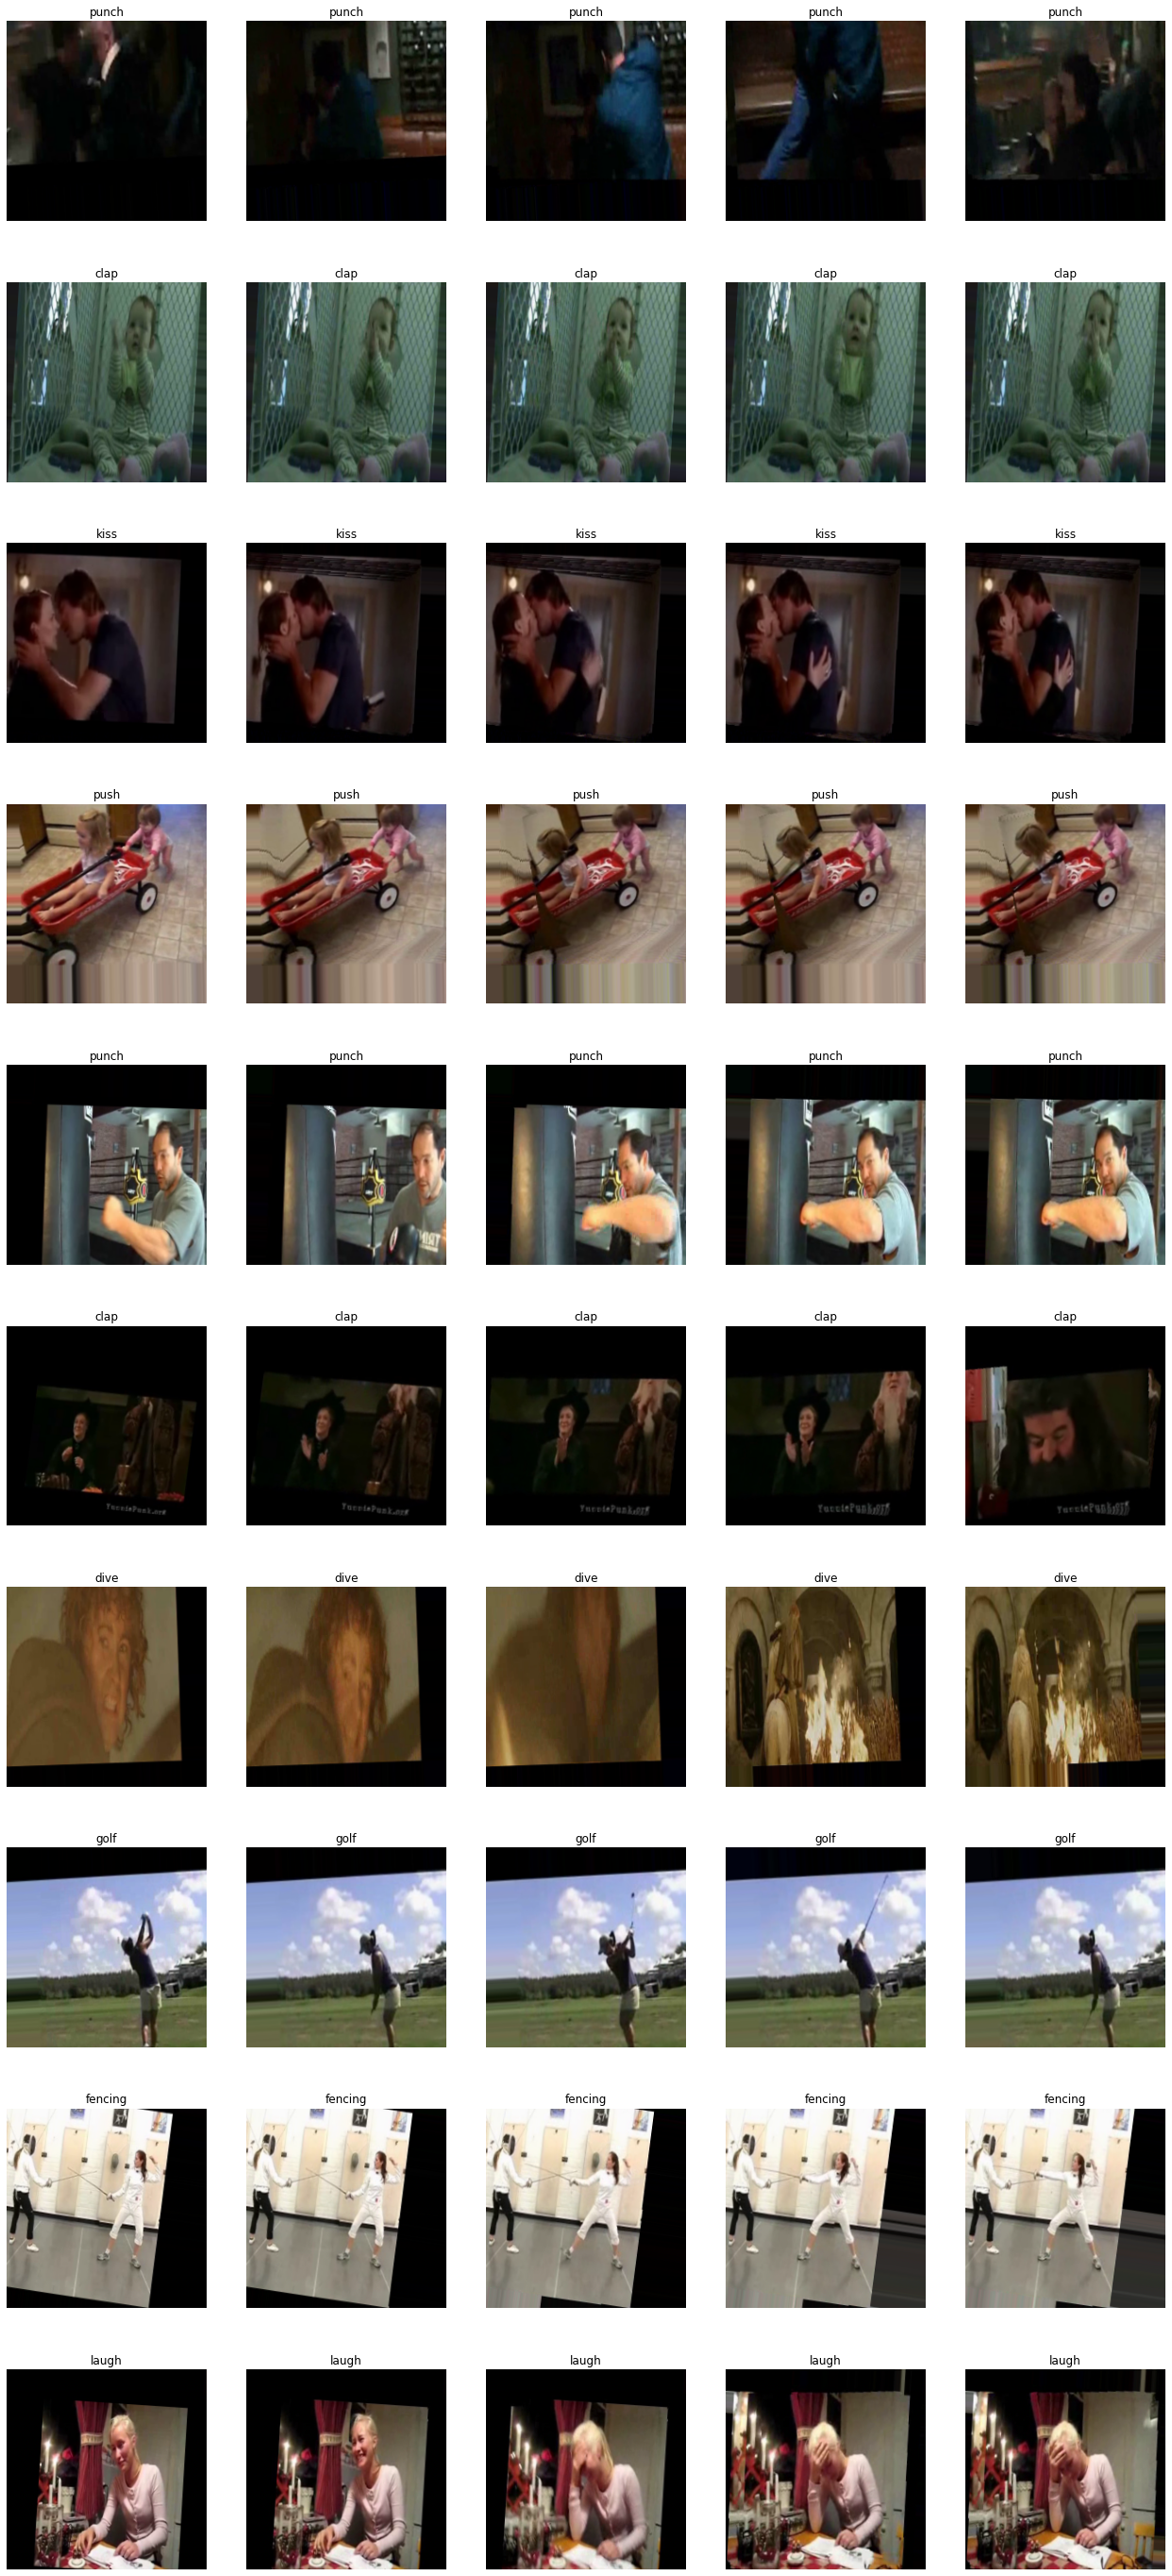

In [ ]:
import keras_video.utils
keras_video.utils.show_sample(train)

In [ ]:
from tensorflow.keras.models import load_model
INSHAPE=(NBFRAME,) + (SIZE, SIZE) + (CHANNELS,)
nbout = len(classes)
print(nbout)
model = load_model("final2040/saved_model/51classes_0419_densenet.h5")
model.summary()

51


KeyboardInterrupt: ignored

In [ ]:
model.evaluate(valid)

In [ ]:
optimizer = keras.optimizers.SGD(0.001)
model.compile(
      optimizer,
      'categorical_crossentropy',
      metrics=['acc'])
model.evaluate(valid)

1327/1327 [==============================] - 954s 713ms/step - loss: 2.9905 - acc: 0.6808


[2.9588894844055176, 0.6895252466201782]

In [ ]:
a, b = train[2]
a.shape

(1, 5, 224, 224, 3)

(1, 5, 224, 224, 3)

In [ ]:
res = model.predict(a)
res = np.argmax(res)
classes[res]

'fall_floor'

The predicted catogoy is: draw_sword


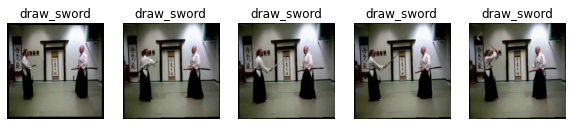

The predicted catogoy is: stand


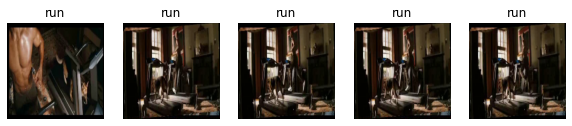

The predicted catogoy is: cartwheel


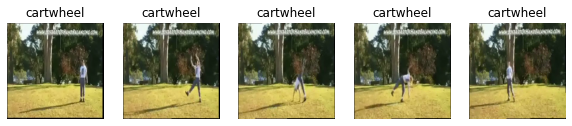

The predicted catogoy is: fall_floor


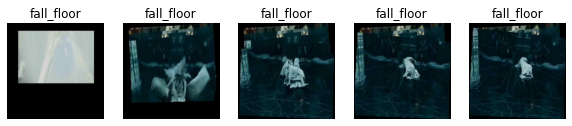

The predicted catogoy is: dive


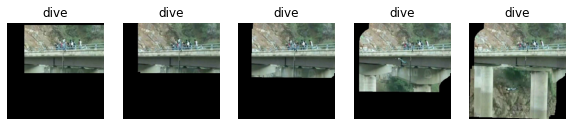

The predicted catogoy is: sword_exercise


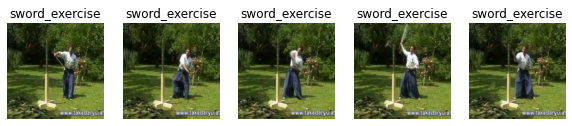

The predicted catogoy is: climb_stairs


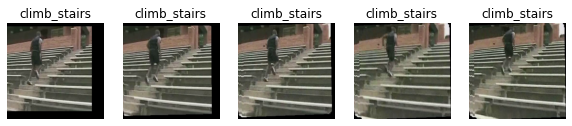

The predicted catogoy is: clap


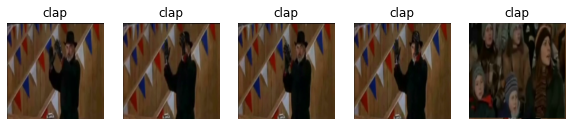

The predicted catogoy is: flic_flac


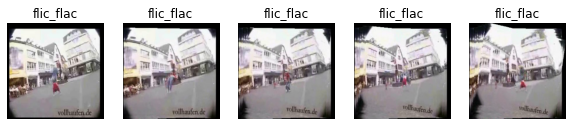

The predicted catogoy is: hit


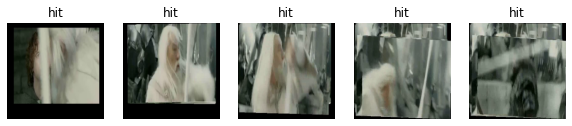

In [ ]:
import matplotlib.pyplot as plt

for i in range(10):
    a, b = train[i]
    sequences = a
    labels = b
    rows = len(sequences)
    index = 1
    res = model.predict(a)
    res = np.argmax(res)
    print("The predicted catogoy is: "+classes[res])
    plt.figure(figsize=(10, 22*rows))
    for batchid, sequence in enumerate(sequences):
        classid = np.argmax(labels[batchid])
        classname = train.classes[classid]
        cols = len(sequence)
        for image in sequence:
            plt.subplot(rows, cols, index)
            plt.title(classname)
            plt.imshow(image)
            plt.axis('off')
            index += 1
    plt.show()

In [ ]:
# import numpy as np
# res = model.predict(train)
# res = np.argmax(res, axis=1)
# cls = []
# for i in res:
#   cls.append(classes[i])
# cls

In [ ]:
keras_video.utils.show_sample(train, index=0, random=False, row_width=22, row_height=5)

NameError: ignored

In [ ]:
# save model
import os
def save_model(model, name):
  model_name = '{}.h5'.format(name)
  save_dir = os.path.join(os.getcwd(), 'final2040/saved_model')
  
  # Save model and weights
  if not os.path.isdir(save_dir):
      os.makedirs(save_dir)
  model_path = os.path.join(save_dir, model_name)
  model.save(model_path)
  print('Saved trained model at %s ' % model_path)

save_model(modelEns, 'Ensemble1_with2')

Saved trained model at /content/gdrive/Shareddrives/final2040/saved_model/Ensemble1_with2.h5 


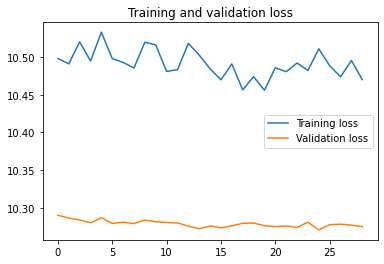

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
#plt.figure()
plt.savefig('final2040/output_figures/25classes_tune_loss.png')

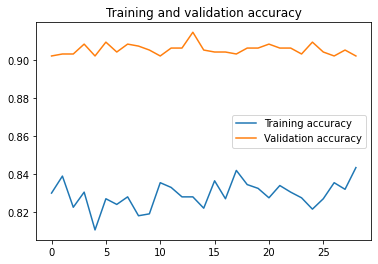

In [ ]:
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
#plt.figure()
plt.savefig('final2040/output_figures/25classes_tune_acc.png')

## Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model

def get_model(mod):
    if mod == 0:
        model = load_model("final2040/saved_model/51classes_0.68_mobilenet.h5")
    # elif mod == 1:
    #     model = load_model("final2040/saved_model/alexnet-51class.h5")
    elif mod == 2:
        model = load_model("final2040/saved_model/51classes_0.72.h5")
    return model

# def get_model():
#     model = load_model("../input/resmodel/resmodel_3.h5")
#     return model

clf1 = tf.keras.wrappers.scikit_learn.KerasClassifier(
                            lambda: get_model(0),
                            epochs=0,
                            verbose=False)
# res2_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(
#                             lambda: get_model(1),
#                             epochs=0,
#                             verbose=False)
clf3 = tf.keras.wrappers.scikit_learn.KerasClassifier(
                            lambda: get_model(2),
                            epochs=0,
                            verbose=False)

for x in [clf1, clf3]:
    x._estimator_type = "classifier"

voting = VotingClassifier(
             estimators=[('1', clf1),
                         #('2', clf2),
                         ('3', clf3)], 
             voting='soft',
             flatten_transform=True)


# for clf in (clf1, res2_clf, res3_clf, voting):
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
voting.fit(train)

In [ ]:
# save model
import os
def save_model(model, name):
  model_name = '{}.h5'.format(name)
  save_dir = os.path.join(os.getcwd(), 'final2040/saved_model')
  
  # Save model and weights
  if not os.path.isdir(save_dir):
      os.makedirs(save_dir)
  model_path = os.path.join(save_dir, model_name)
  model.save(model_path)
  print('Saved trained model at %s ' % model_path)

save_model(model, '16classes_0417_0.8687')

Saved trained model at /content/gdrive/Shareddrives/final2040/saved_model/MobileNet_lr0.001.h5 


In [ ]:
from tensorflow.keras.models import load_model

def ensembleModels(models, model_input):
    # collect outputs of models in a list
    yModels=[model(model_input) for model in models] 
    # averaging outputs
    yAvg=tf.keras.layers.average(yModels) 
    # build model from same input and avg output
    modelEns = tf.keras.Model(inputs=model_input, outputs=yAvg, name='ensemble') 
   
    return modelEns

m1 = load_model("final2040/saved_model/51classes_0419_1.h5")
m1._name = 'mob1'
m2 = load_model("final2040/saved_model/51classes_0419_densenet.h5")
m2._name = 'dense2'
m3 = load_model("final2040/saved_model/51classes_0419_2.h5")
m3._name = 'alex3'
models = [m1, m2, m3]
model_input = tf.keras.layers.Input(shape=models[0].input_shape[1:]) 
modelEns = ensembleModels(models, model_input)

In [ ]:
modelEns.compile(
      tf.keras.optimizers.SGD(0.001),
      'categorical_crossentropy',
      metrics=['acc'])
modelEns.evaluate(valid)

1327/1327 [==============================] - 802s 592ms/step - loss: 5.5020 - acc: 0.7436


[5.512193202972412, 0.7256970405578613]

In [ ]:
m3.compile(
      tf.keras.optimizers.SGD(0.001),
      'categorical_crossentropy',
      metrics=['acc'])
m3.evaluate(valid)

1327/1327 [==============================] - 265s 195ms/step - loss: 3.2068 - acc: 0.6240


[3.200291633605957, 0.6299924850463867]

The predicted catogoy is: sword_exercise


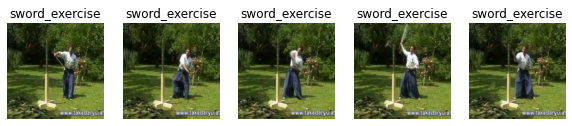

The predicted catogoy is: climb_stairs


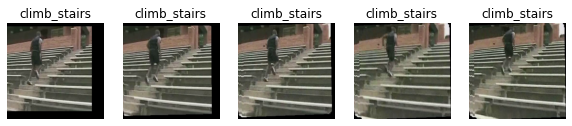

The predicted catogoy is: clap


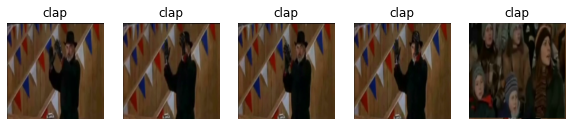

The predicted catogoy is: flic_flac


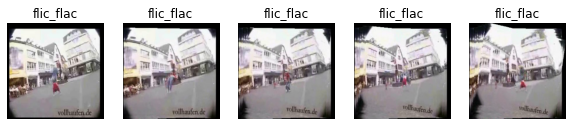

The predicted catogoy is: hit


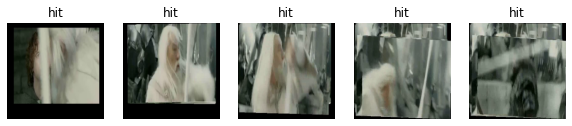

In [ ]:
for i in range(10):
    a, b = valid[i]
    sequences = a
    labels = b
    rows = len(sequences)
    index = 1
    res = modelEns.predict(a)
    res = np.argmax(res)
    print("The predicted catogoy is: "+classes[res])
    plt.figure(figsize=(10, 22*rows))
    for batchid, sequence in enumerate(sequences):
        classid = np.argmax(labels[batchid])
        classname = train.classes[classid]
        cols = len(sequence)
        for image in sequence:
            plt.subplot(rows, cols, index)
            plt.title(classname)
            plt.imshow(image)
            plt.axis('off')
            index += 1
    plt.show()

The predicted catogoy is: pushup


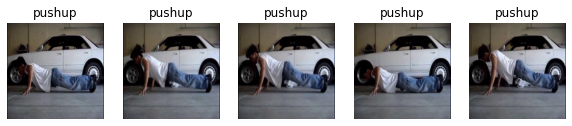

The predicted catogoy is: kiss


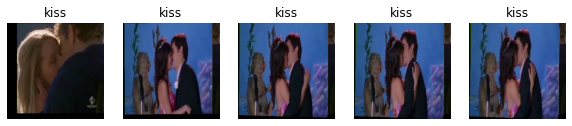

The predicted catogoy is: clap


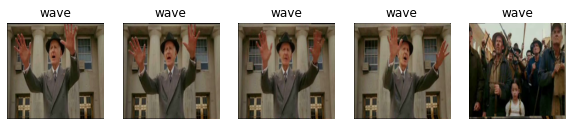

The predicted catogoy is: fall_floor


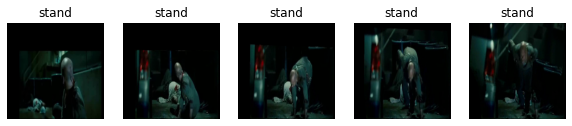

The predicted catogoy is: walk


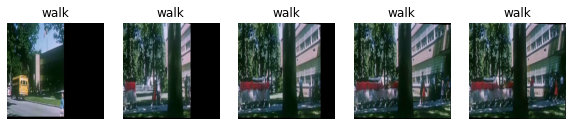

The predicted catogoy is: handstand


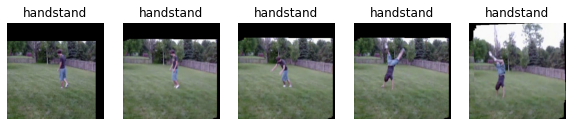

The predicted catogoy is: walk


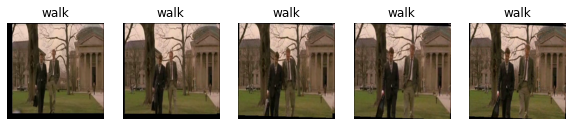

The predicted catogoy is: shoot_bow


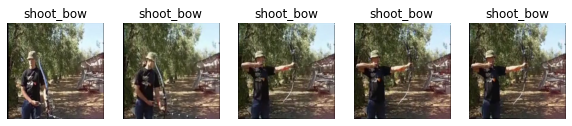

The predicted catogoy is: ride_bike


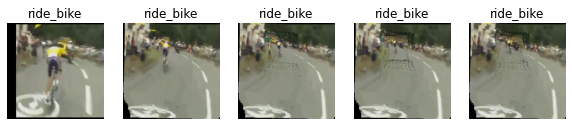

The predicted catogoy is: shoot_gun


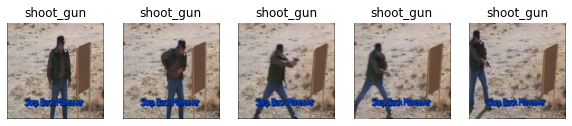

In [ ]:
for i in range(10):
    a, b = valid[i]
    sequences = a
    labels = b
    rows = len(sequences)
    index = 1
    res = model.predict(a)
    res = np.argmax(res)
    print("The predicted catogoy is: "+classes[res])
    plt.figure(figsize=(10, 22*rows))
    for batchid, sequence in enumerate(sequences):
        classid = np.argmax(labels[batchid])
        classname = train.classes[classid]
        cols = len(sequence)
        for image in sequence:
            plt.subplot(rows, cols, index)
            plt.title(classname)
            plt.imshow(image)
            plt.axis('off')
            index += 1
    plt.show()